<a href="https://colab.research.google.com/github/Srinithi333/Srinithi333/blob/main/hackathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving colors.csv to colors.csv


2. Load the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/colors.csv")
print(df.head())

              ColorName      ColorNameReadable  HexCode    R    G    B
0    air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
1   air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
2  air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
3       alabama_crimson        Alabama Crimson  #a32638  163   38   56
4            alice_blue             Alice Blue  #f0f8ff  240  248  255


 3. Data Exploration

In [ ]:
 df.info()
df.describe()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ColorName          865 non-null    object
 1   ColorNameReadable  865 non-null    object
 2   HexCode            865 non-null    object
 3   R                  865 non-null    int64 
 4   G                  865 non-null    int64 
 5   B                  865 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 40.7+ KB


,ColorName,ColorNameReadable,HexCode,R,G,B
23,aquamarine,Aquamarine,#7fffd4,127,255,212
292,english_lavender,English Lavender,#b48395,180,131,149
281,electric_crimson,Electric Crimson,#ff003f,255,0,63
375,india_green,India Green,#138808,19,136,8
465,maize,Maize,#fbec5d,251,236,93


 4. Check for Missing Values and Duplicates

In [ ]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate entries:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Missing values:
 ColorName            0
ColorNameReadable    0
HexCode              0
R                    0
G                    0
B                    0
dtype: int64
Duplicate entries: 0


5. Visualize a Few Features

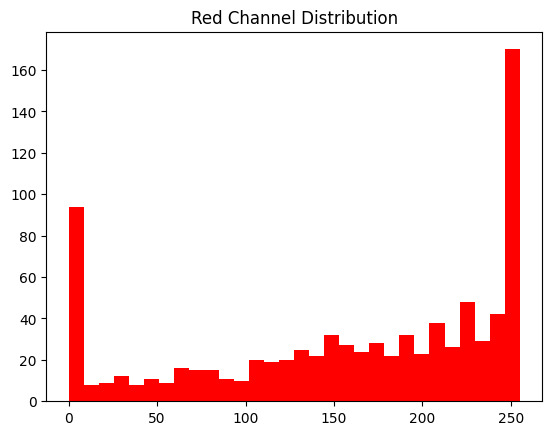

In [ ]:
import matplotlib.pyplot as plt

# Example: Histogram of Red values
plt.hist(df['R'], bins=30, color='red')
plt.title('Red Channel Distribution')
plt.show()


6. Identify Target and Features

In [ ]:
X = df[['R', 'G', 'B']]
y = df['ColorName']  # Replace with your actual label column

 7. Convert Categorical Columns to Numerical (if needed)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

8. One-Hot Encoding (if you prefer)

In [ ]:
y_onehot = pd.get_dummies(y)

9. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 10. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

11. Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

12. Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Import numpy to get unique values

# Predict labels for test set
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report using original class names
# Use le.classes_ to get all possible target names from the fitted encoder

# Get the unique encoded classes present in both y_test and y_pred
unique_classes_in_test_and_pred = np.unique(np.concatenate((y_test, y_pred)))

# Use these unique encoded classes as labels for the report
report_labels = unique_classes_in_test_and_pred

# Select the corresponding names from le.classes_ for these labels
# This ensures target_names aligns with the labels being reported on
target_names_for_report = le.classes_[report_labels]


# Provide both the specific labels and the corresponding target names to classification_report
print(classification_report(y_test, y_pred, labels=report_labels, target_names=target_names_for_report))

Accuracy: 0.0
                                precision    recall  f1-score   support

            air_force_blue_raf       0.00      0.00      0.00       0.0
               alabama_crimson       0.00      0.00      0.00       0.0
              alizarin_crimson       0.00      0.00      0.00       1.0
                        almond       0.00      0.00      0.00       0.0
                 amber_sae_ece       0.00      0.00      0.00       1.0
                    aquamarine       0.00      0.00      0.00       1.0
                    army_green       0.00      0.00      0.00       0.0
                arylide_yellow       0.00      0.00      0.00       0.0
                      ash_grey       0.00      0.00      0.00       0.0
                     asparagus       0.00      0.00      0.00       0.0
              atomic_tangerine       0.00      0.00      0.00       1.0
                        auburn       0.00      0.00      0.00       1.0
                      aureolin       0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

 13. Make Predictions from New Input
python
Copy code


In [ ]:
new_rgb = [[100, 150, 200]]  # Example RGB input
new_rgb_scaled = scaler.transform(new_rgb)
predicted_class = model.predict(new_rgb_scaled)
print("Predicted Color:", le.inverse_transform(predicted_class)[0])

Predicted Color: cerulean_frost


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


14. Convert to DataFrame and Encode

In [ ]:
input_df = pd.DataFrame([[100, 150, 200]], columns=['R', 'G', 'B'])
input_scaled = scaler.transform(input_df)


15. Predict the Final Grade (in this case: Color Name)

In [ ]:
prediction = model.predict(input_scaled)
print("Final Detected Color:", le.inverse_transform(prediction)[0])


Final Detected Color: cerulean_frost


In [ ]:
def predict_color(r, g, b):
    input_data = pd.DataFrame([[r, g, b]], columns=['R', 'G', 'B'])
    scaled = scaler.transform(input_data)
    pred = model.predict(scaled)
    return le.inverse_transform(pred)[0]


18. Create the Gradio Interface

In [ ]:
# Install gradio if it's not already installed
!pip install gradio -q
import gradio as gr

interface = gr.Interface(
    fn=predict_color,
    inputs=[gr.Slider(0, 255, label="Red"),
            gr.Slider(0, 255, label="Green"),
            gr.Slider(0, 255, label="Blue")],
    outputs="text",
    title="🎨 Color Detector from RGB"
)

interface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4ebf2f768dece19fdc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory